In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import ttest_ind, chi2_contingency
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd
import sys
sys.path.append('../src')
from functions import *
import seaborn as sns
# raw data
df_clients_profile = pd.read_csv('../Data/Raw/df_final_demo.txt')
df_web_data_1 = pd.read_csv('../Data/Raw/df_final_web_data_pt_1.txt')
df_web_data_2 = pd.read_csv('../Data/Raw/df_final_web_data_pt_2.txt')
df_experiment_clients = pd.read_csv('../Data/Raw/df_final_experiment_clients.txt')
# processed data
df_test = pd.read_csv('../Data/Cleaned_Data/df_test.csv')
df_test_final = pd.read_csv('../Data/Cleaned_Data/df_test_final.csv')
df_control = pd.read_csv('../Data/Cleaned_Data/df_control.csv')
df_control_final = pd.read_csv('../Data/Cleaned_Data/df_control_final.csv')
df_final = pd.read_csv('../Data/Cleaned_Data/df_final.csv')
df_combined = pd.read_csv('../Data/Cleaned_Data/df_combined.csv')
pd.set_option('display.max_columns', None)
df_web_data = pd.concat([df_web_data_1, df_web_data_2], ignore_index= True)

In [3]:
df_test = convert_data_types_combined(df_test)
df_test_final = convert_data_types_combined(df_test_final)
df_control = convert_data_types_combined(df_control)
df_control_final = convert_data_types_combined(df_control_final)
df_final = convert_data_types_combined(df_final)
df_combined = convert_data_types_combined(df_combined)

In [4]:
df_test = convert_data_types_combined(df_test)
df_test_final = convert_data_types_combined(df_test_final)
df_control = convert_data_types_combined(df_control)
df_control_final = convert_data_types_combined(df_control_final)
df_final = convert_data_types_combined(df_final)
df_combined = convert_data_types_combined(df_combined)

In [5]:
df_test = convert_data_types_combined(df_test)
df_test_final = convert_data_types_combined(df_test_final)
df_control = convert_data_types_combined(df_control)
df_control_final = convert_data_types_combined(df_control_final)
df_final = convert_data_types_combined(df_final)
df_combined = convert_data_types_combined(df_combined)

# Loading the Data

In [6]:
df_test_final = pd.read_csv('../Data/Cleaned_Data/df_test_final.csv')
df_control_final = pd.read_csv('../Data/Cleaned_Data/df_control_final.csv')
pd.set_option('display.max_columns', None)

# df_control

## Check the data types

In [7]:
df_control_final.dtypes

client_id                      int64
visit_visitor_id              object
start_time                   float64
step_1                       float64
step_2                       float64
step_3                       float64
time_completion              float64
navigations_bt_start_last      int64
completion                     int64
start_step                     int64
1st_step                       int64
2nd_step                       int64
3rd_step                       int64
last_step                     object
variation                     object
clnt_tenure_yr                 int64
clnt_tenure_mnth               int64
clnt_age                       int64
gendr                         object
num_accts                      int64
bal                          float64
calls_6_mnth                   int64
logons_6_mnth                  int64
date                          object
initial_date                  object
total_time_visit             float64
final_date                    object
d

## Categorical columns

In [8]:
tab_control_last_step = df_control_final['last_step'].value_counts().reset_index()
tab_control_last_step.columns = ['last_step', 'count']
tab_control_last_step

,last_step,count
0,confirm,15381
1,start,9644
2,step_1,3498
3,step_3,2252
4,step_2,1460


In [9]:
# Extracting column names with numerical data types from the dataframe
df_control_final.select_dtypes("object").columns


Index(['visit_visitor_id', 'last_step', 'variation', 'gendr', 'date',
       'initial_date', 'final_date'],
      dtype='object')

In [10]:
frequency_proportion(df_control_final, 'last_step')

Frequency:last_step
confirm    15381
start       9644
step_1      3498
step_3      2252
step_2      1460
Name: count, dtype: int64
Proportion: last_step
confirm    0.477152
start      0.299178
step_1     0.108516
step_3     0.069862
step_2     0.045292
Name: proportion, dtype: float64


In [11]:
df_control_final['last_step'].value_counts()

last_step
confirm    15381
start       9644
step_1      3498
step_3      2252
step_2      1460
Name: count, dtype: int64

In [12]:
tab_control_last_step = df_control_final['last_step'].value_counts().reset_index()
tab_control_last_step.columns = ['last_step', 'count']
tab_control_last_step

,last_step,count
0,confirm,15381
1,start,9644
2,step_1,3498
3,step_3,2252
4,step_2,1460


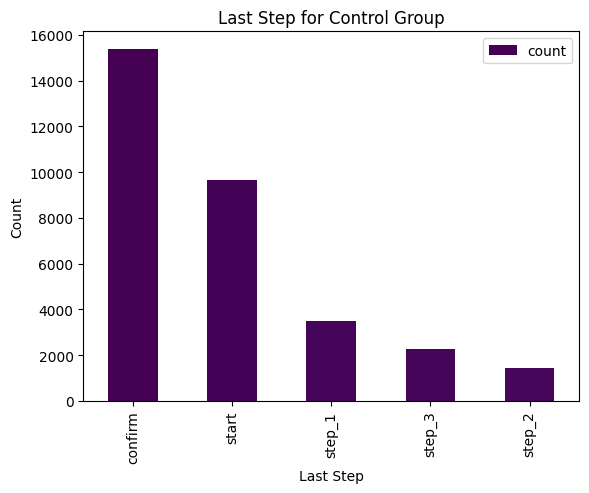

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming 'tab_control_last_step' is your DataFrame
colors = cm.viridis(range(len(tab_control_last_step)))

tab_control_last_step.plot(x='last_step', y='count', kind='bar', color=colors)
plt.xlabel('Last Step')
plt.ylabel('Count')
plt.title('Last Step for Control Group')
plt.show()


In [14]:
tab_control_gender = cross_table(df_control_final, 'gendr')
tab_control_gender

,gendr,count
0,F,10442
1,M,11094
2,Other,10699


In [15]:
# Calculating the proportions for each value in 'tab_test_last_step' and rounding the results to two decimal places
(tab_control_gender['count'] / tab_control_gender['count'].sum()).round(2)

0    0.32
1    0.34
2    0.33
Name: count, dtype: float64

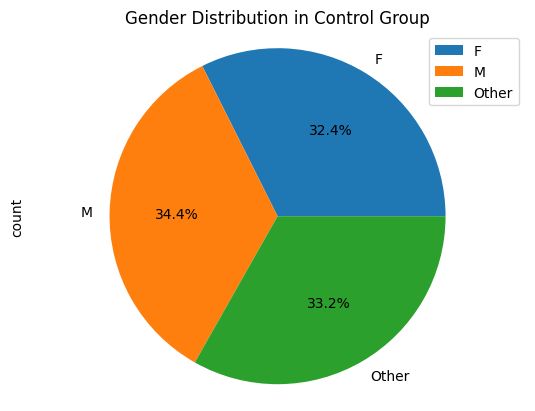

In [16]:
tab_control_gender.plot.pie(y='count', labels=tab_control_gender['gendr'], autopct='%1.1f%%')
plt.title('Gender Distribution in Control Group')
plt.axis('equal')
plt.show()

## Numerical columns

## Check the data types

### Centrality and Dispersion Measures

In [17]:
# Extracting column names with numerical data types from the dataframe
control_numerical_columns = df_control_final.select_dtypes("number").columns
print(control_numerical_columns)
print(df_control_final.dtypes)

Index(['client_id', 'start_time', 'step_1', 'step_2', 'step_3',
       'time_completion', 'navigations_bt_start_last', 'completion',
       'start_step', '1st_step', '2nd_step', '3rd_step', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth',
       'logons_6_mnth', 'total_time_visit'],
      dtype='object')
client_id                      int64
visit_visitor_id              object
start_time                   float64
step_1                       float64
step_2                       float64
step_3                       float64
time_completion              float64
navigations_bt_start_last      int64
completion                     int64
start_step                     int64
1st_step                       int64
2nd_step                       int64
3rd_step                       int64
last_step                     object
variation                     object
clnt_tenure_yr                 int64
clnt_tenure_mnth               int64
clnt_age             

In [18]:
control_numerical_columns = pd.DataFrame

In [19]:
control_numerical_columns = ['start_time', 'step_1', 'step_2', 'step_3', 'time_completion',
       'navigations_bt_start_last', 'start_step', '1st_step', '2nd_step',
       '3rd_step', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth',
       'total_time_visit']
print(control_numerical_columns)

['start_time', 'step_1', 'step_2', 'step_3', 'time_completion', 'navigations_bt_start_last', 'start_step', '1st_step', '2nd_step', '3rd_step', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'total_time_visit']


In [20]:
# Extracting column names with numerical data types from the dataframe
df_control_final.select_dtypes("number").nunique().sort_values(ascending=False)

client_id                    23526
bal                          23488
total_time_visit              1958
start_time                    1435
step_3                        1299
step_2                         962
step_1                         881
time_completion                457
clnt_tenure_mnth               443
clnt_age                        79
clnt_tenure_yr                  52
navigations_bt_start_last       34
start_step                      20
2nd_step                        16
3rd_step                        15
1st_step                        12
completion                      10
calls_6_mnth                     7
logons_6_mnth                    7
num_accts                        6
dtype: int64

In [21]:
df_control_final.describe()

,client_id,start_time,step_1,step_2,step_3,time_completion,navigations_bt_start_last,completion,start_step,1st_step,2nd_step,3rd_step,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth,total_time_visit
count,3.223500e+04,32235.000000,32235.000000,32235.000000,32235.000000,32235.000000,32235.000000,32235.000000,32235.000000,32235.000000,32235.000000,32235.000000,32235.000000,32235.000000,32235.000000,32235.000000,3.223500e+04,32235.000000,32235.000000,32235.000000
mean,5.020620e+06,1.234396,0.679452,1.156257,1.437197,0.167418,4.906003,0.542826,1.476315,0.920025,0.802761,0.706902,12.343881,154.115061,48.456336,2.281216,1.631135e+05,3.335226,6.371646,4.674720
std,2.870872e+06,5.621819,2.854033,2.864852,3.417656,2.322744,2.631791,0.636612,1.211958,0.812354,0.851475,0.807662,7.045203,84.154800,15.795884,0.563732,3.146467e+05,2.192733,2.180020,8.826849
min,1.028000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,33.000000,17.000000,2.000000,2.378961e+04,0.000000,3.000000,0.000000
25%,2.532372e+06,0.083333,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.000000,82.000000,35.000000,2.000000,4.172376e+04,1.000000,4.000000,0.366667
50%,5.034038e+06,0.283333,0.183333,0.650000,0.350000,0.000000,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000,11.000000,141.000000,50.000000,2.000000,7.019437e+04,3.000000,6.000000,2.650000
75%,7.479669e+06,0.800000,0.616667,1.566667,1.533333,0.000000,6.000000,1.000000,2.000000,1.000000,1.000000,1.000000,16.000000,196.000000,61.000000,2.000000,1.541871e+05,6.000000,9.000000,5.675000
max,9.998921e+06,699.283333,268.300000,362.716667,121.133333,156.600000,81.000000,9.000000,32.000000,16.000000,24.000000,24.000000,55.000000,669.000000,96.000000,7.000000,8.292996e+06,6.000000,9.000000,699.416667


In [22]:
# Filtering the numerical columns for analysi
df_numerical_control = pd.DataFrame(df_control_final[control_numerical_columns])

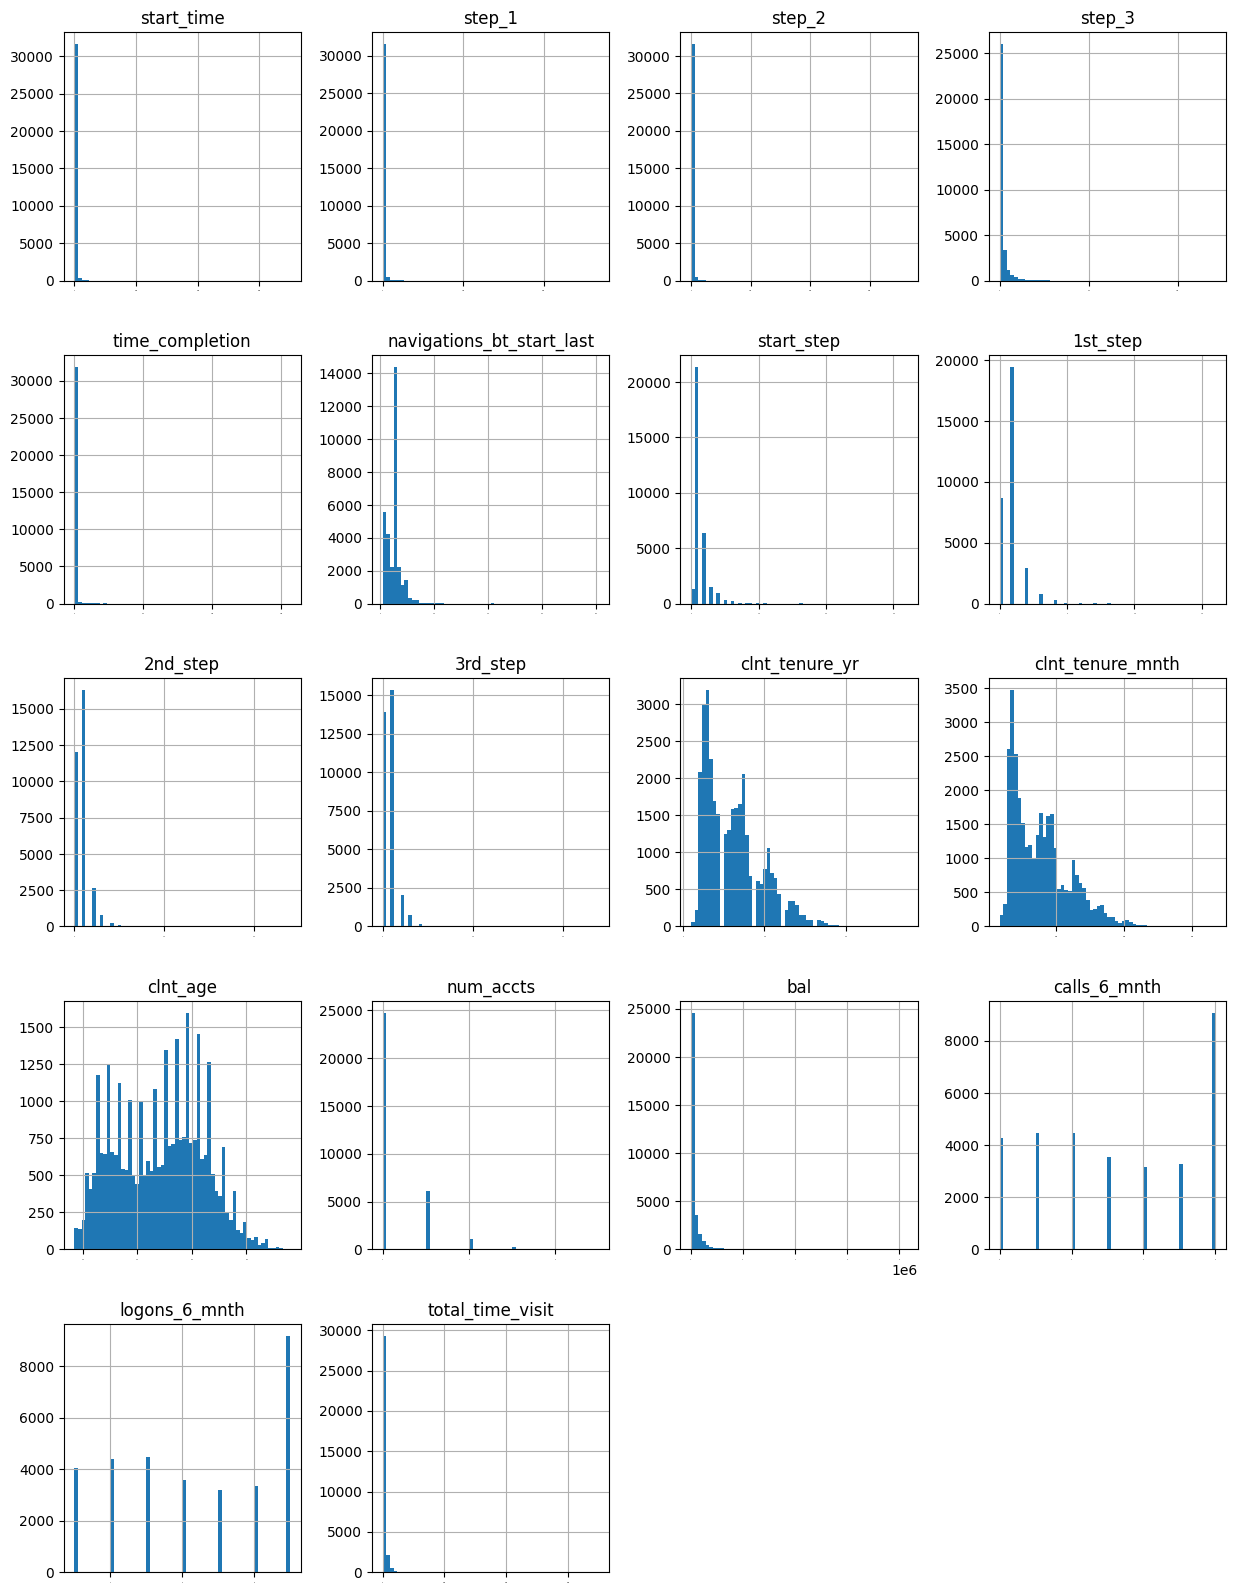

In [23]:
# Plotting histograms for the numerical columns before removing outliers
df_numerical_control.hist(figsize=(15, 20), bins=60, xlabelsize=1, ylabelsize=10);

In [24]:
# Applying IQR method to each specified column
for column in control_numerical_columns:
    df_control_final = remove_outliers_iqr(df_control_final, column)
    df_numerical_control = pd.DataFrame(df_control_final[control_numerical_columns])

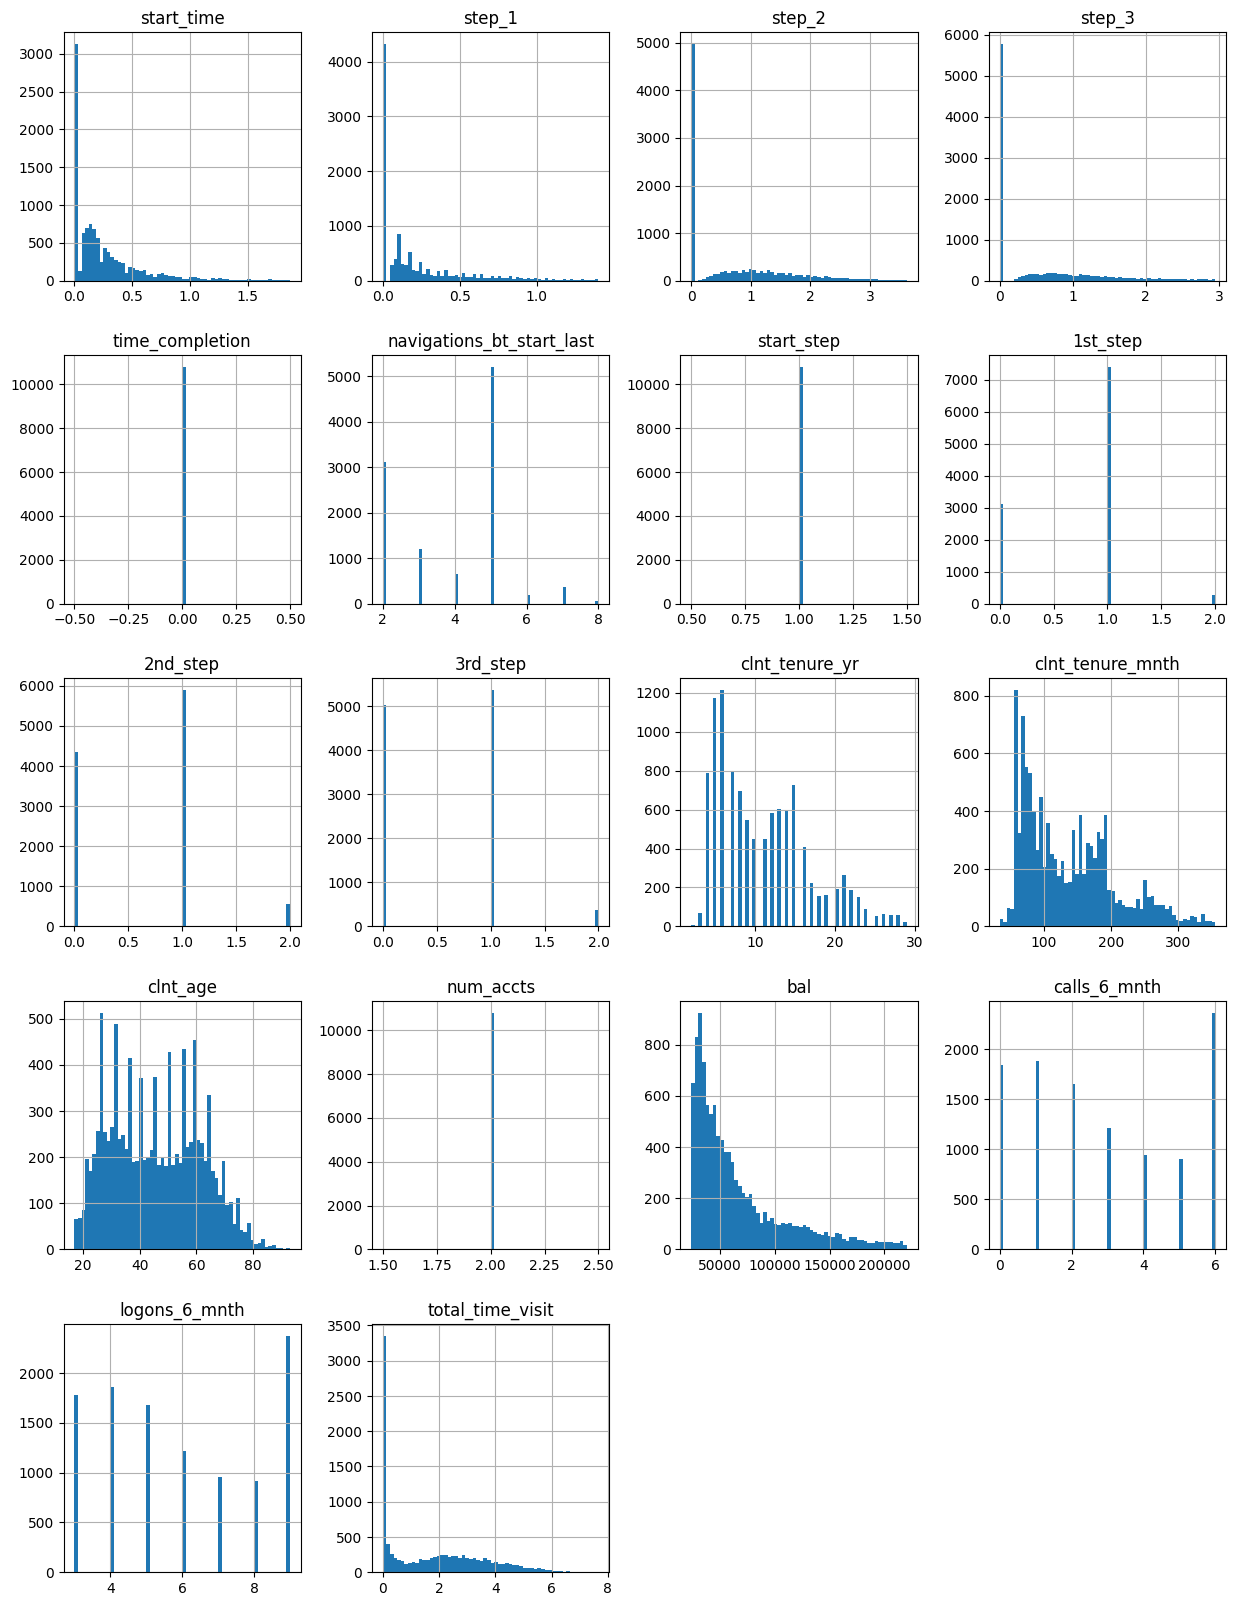

In [25]:
# Plotting histograms for the numerical columns after removing outliers
df_numerical_control.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

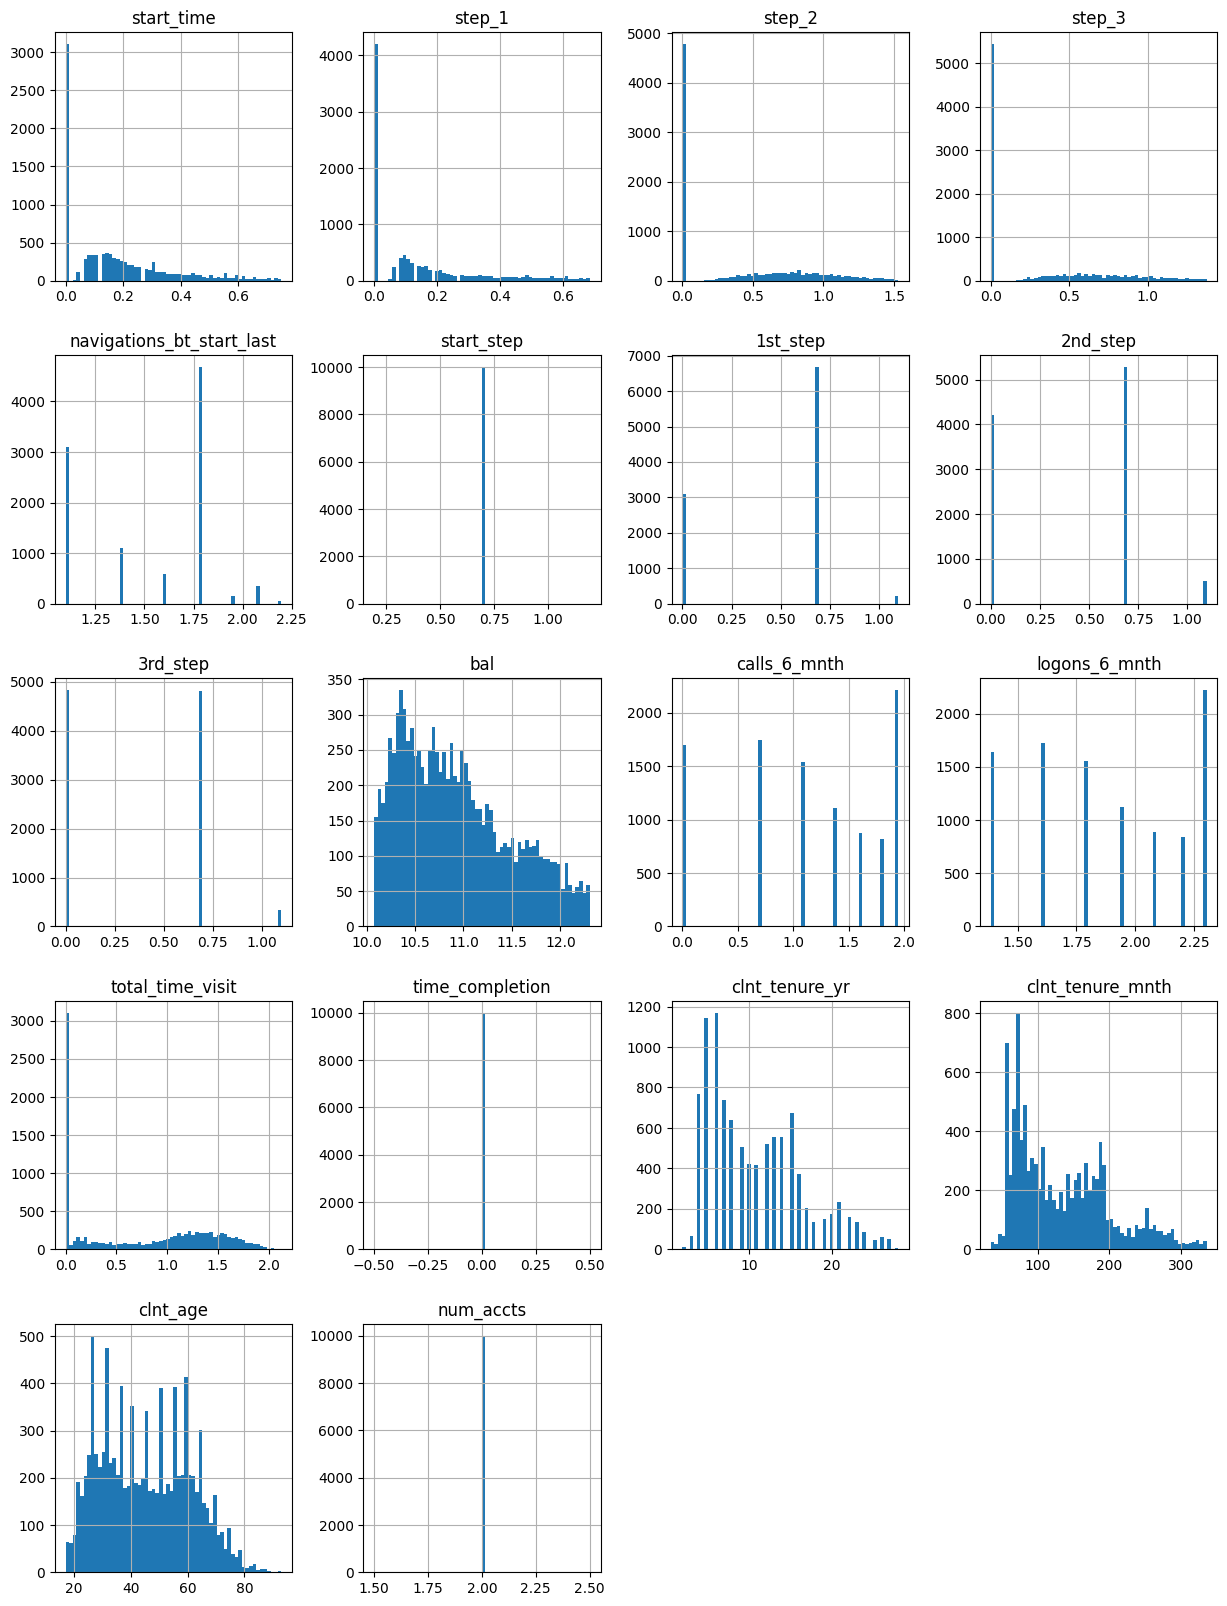

In [26]:
# List of columns to apply log transformation
log_transform_columns = [
    'start_time', 'step_1', 'step_2', 'step_3', 'navigations_bt_start_last',
    'start_step', '1st_step', '2nd_step', '3rd_step', 'bal',
    'calls_6_mnth', 'logons_6_mnth', 'total_time_visit'
]
# Applying log transformation
for column in log_transform_columns:
    df_control_final[column] = np.log1p(df_control_final[column])

# Reapplying IQR method to each specified column after log transformation
control_numerical_columns = log_transform_columns + [
    'time_completion', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts'
]
for column in control_numerical_columns:
    df_control_final = remove_outliers_iqr(df_control_final, column)
# Filtering the numerical columns for analysis
df_numerical_control = pd.DataFrame(df_control_final[control_numerical_columns]) 

# Plotting histograms for the numerical columns after removing outliers
df_numerical_control.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);


In [27]:
df_control_final.to_csv('../Data/Cleaned_Data/df_control_final.csv', index=False)  

# df_test

## Check the data types

## Univariate Analysis - df_test

In [28]:
df_test_final = convert_data_types_final(df_test_final)


## Categorical columns

In [29]:
# Extracting column names with numerical data types from the dataframe
df_test_final.select_dtypes("object").columns


Index(['client_id', 'visit_visitor_id', 'last_step', 'variation', 'gendr'], dtype='object')

In [30]:
test_categorical_columns = ['last_step', 'gendr']

In [31]:
# Extracting column names with numerical data types from the dataframe
df_test_final.select_dtypes("object").nunique().sort_values(ascending=False)

visit_visitor_id    37122
client_id           26961
last_step               5
gendr                   3
variation               1
dtype: int64

In [32]:
frequency_proportion(df_test_final, 'last_step')

Frequency:last_step
confirm    21496
start       9452
step_1      3139
step_3      1782
step_2      1321
Name: count, dtype: int64
Proportion: last_step
confirm    0.578005
start      0.254154
step_1     0.084404
step_3     0.047916
step_2     0.035520
Name: proportion, dtype: float64


In [33]:
frequency_proportion(df_test_final, 'gendr')

Frequency:gendr
M        12661
Other    12334
F        12195
Name: count, dtype: int64
Proportion: gendr
M        0.340441
Other    0.331648
F        0.327911
Name: proportion, dtype: float64


In [34]:
cross_table(df_test_final, 'start_time')

,start_time,count
0,0.00,7125
1,0.02,32
2,0.03,101
3,0.05,664
4,0.07,1195
...,...,...
1173,113.70,1
1174,116.25,1
1175,117.27,1
1176,129.97,1


In [35]:
frequency_proportion(df_test_final, 'start_time')

Frequency:start_time
0.00      7125
0.15      1391
0.13      1377
0.12      1339
0.10      1312
          ... 
61.12        1
12.32        1
38.47        1
50.95        1
117.27       1
Name: count, Length: 1178, dtype: int64
Proportion: start_time
0.00      0.191584
0.15      0.037403
0.13      0.037026
0.12      0.036004
0.10      0.035278
            ...   
61.12     0.000027
12.32     0.000027
38.47     0.000027
50.95     0.000027
117.27    0.000027
Name: proportion, Length: 1178, dtype: float64


In [36]:
df_test_final['last_step'].value_counts()

last_step
confirm    21496
start       9452
step_1      3139
step_3      1782
step_2      1321
Name: count, dtype: int64

In [37]:
tab_test_last_step = df_test_final['last_step'].value_counts().reset_index()
tab_test_last_step.columns = ['last_step', 'count']
tab_test_last_step

,last_step,count
0,confirm,21496
1,start,9452
2,step_1,3139
3,step_3,1782
4,step_2,1321


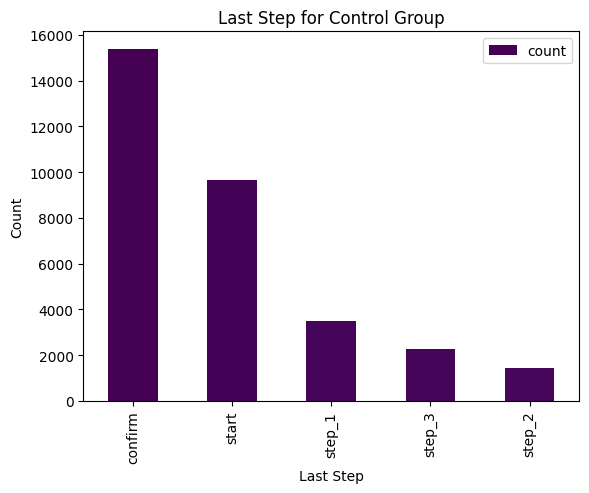

In [38]:

import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming 'tab_control_last_step' is your DataFrame
colors = cm.viridis(range(len(tab_control_last_step)))

tab_control_last_step.plot(x='last_step', y='count', kind='bar', color=colors)
plt.xlabel('Last Step')
plt.ylabel('Count')
plt.title('Last Step for Control Group')
plt.show()


In [39]:
tab_test_last_step = df_test_final['last_step'].value_counts().reset_index()
tab_test_last_step.columns = ['last_step', 'count']
tab_test_last_step

,last_step,count
0,confirm,21496
1,start,9452
2,step_1,3139
3,step_3,1782
4,step_2,1321


In [40]:
# Calculating the proportions for each value in 'tab_test_last_step' and rounding the results to two decimal places
(tab_test_last_step['count'] / tab_test_last_step['count'].sum())

0    0.578005
1    0.254154
2    0.084404
3    0.047916
4    0.035520
Name: count, dtype: float64

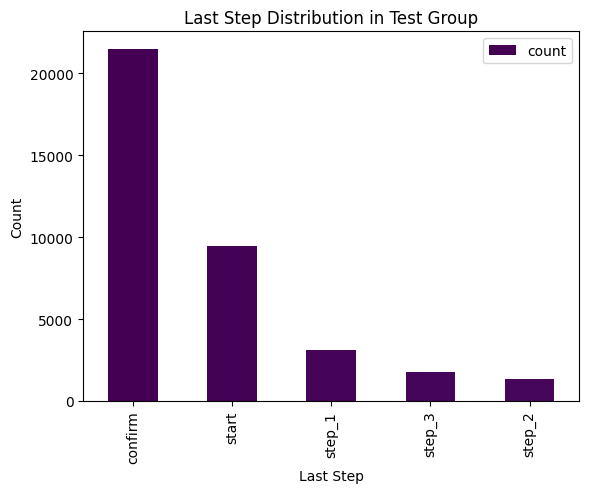

In [41]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming 'tab_test_last_step' is your DataFrame
colors = cm.viridis(range(len(tab_test_last_step)))

tab_test_last_step.plot(x='last_step', y='count', kind='bar', color=colors)
plt.xlabel('Last Step')
plt.ylabel('Count')
plt.title('Last Step Distribution in Test Group')
plt.show()

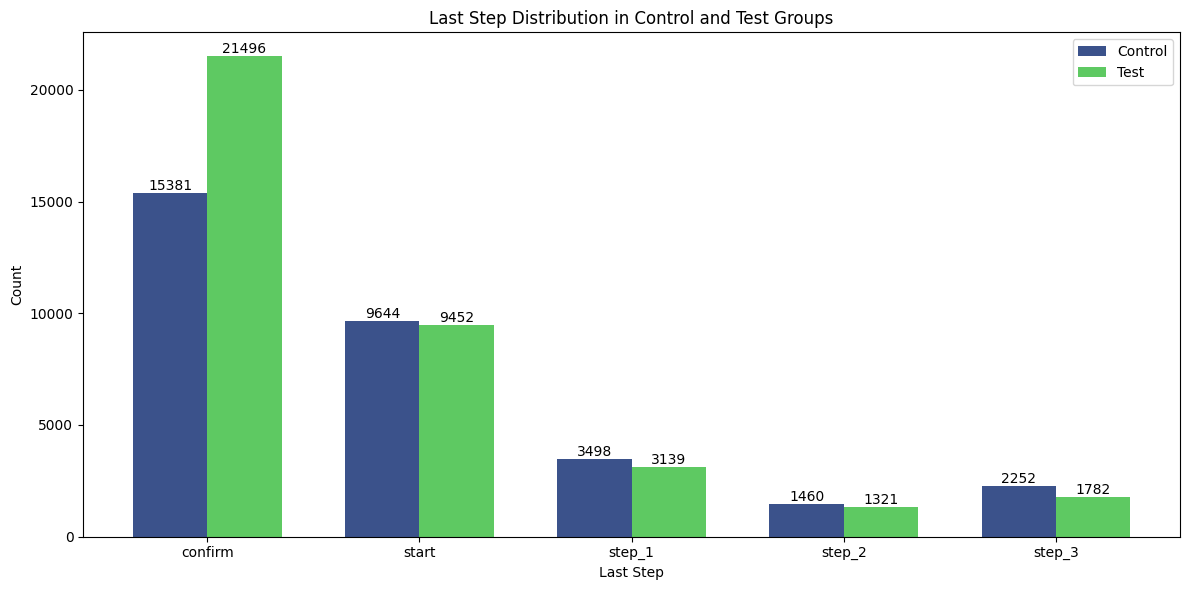

In [43]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Provided data
data_test = {
    'last_step': ['confirm', 'start', 'step_1', 'step_3', 'step_2'],
    'count': [21496, 9452, 3139, 1782, 1321]
}
tab_test_last_step = pd.DataFrame(data_test)

data_control = {
    'last_step': ['confirm', 'start', 'step_1', 'step_3', 'step_2'],
    'count': [15381, 9644, 3498, 2252, 1460]
}
tab_control_last_step = pd.DataFrame(data_control)

# Merge the dataframes to align the steps for comparison
tab_combined = pd.merge(tab_control_last_step, tab_test_last_step, on='last_step', how='outer', suffixes=('_control', '_test')).fillna(0)

# Create a bar plot with the Viridis palette
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = range(len(tab_combined))

colors = cm.viridis([0.25, 0.75])  # Selecting two distinct colors from the viridis palette

# Plot control group
bars_control = ax.bar(index, tab_combined['count_control'], bar_width, label='Control', color=colors[0])

# Plot test group
bars_test = ax.bar([i + bar_width for i in index], tab_combined['count_test'], bar_width, label='Test', color=colors[1])

# Add counts on top of the bars

for bar in bars_test:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=10)

for bar in bars_control:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=10)


# Set the labels and title
ax.set_xlabel('Last Step')
ax.set_ylabel('Count')
ax.set_title('Last Step Distribution in Control and Test Groups')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(tab_combined['last_step'])
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:

tab_test_gender = cross_table(df_test_final, 'gendr')
tab_test_gender


,gendr,count
0,F,1878
1,M,1703
2,Other,2297


In [ ]:
# Calculating the proportions for each value in 'tab_test_last_step' and rounding the results to two decimal places
(tab_test_gender['count'] / tab_test_gender['count'].sum()).round(2)

0    0.32
1    0.29
2    0.39
Name: count, dtype: float64

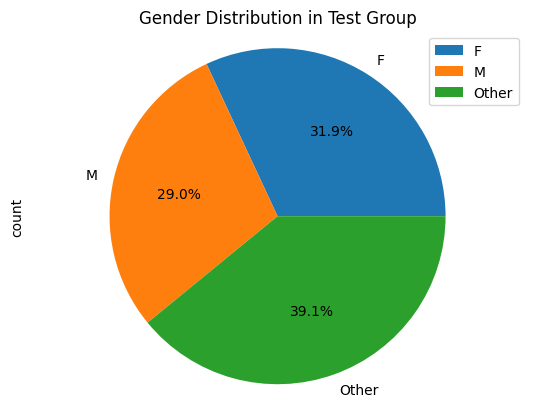

In [ ]:
tab_test_gender.plot.pie(y='count', labels=tab_test_gender['gendr'], autopct='%1.1f%%')
plt.title('Gender Distribution in Test Group')
plt.axis('equal')
plt.show()

## Numerical columns

### Centrality and Dispersion Measures

In [ ]:
# Extracting column names with numerical data types from the dataframe
df_test_final.select_dtypes("number").columns

Index(['start_time', 'step_1', 'step_2', 'step_3', 'time_completion',
       'navigations_bt_start_last', 'completion', 'start_step', '1st_step',
       '2nd_step', '3rd_step', 'clnt_tenure_yr', 'clnt_tenure_mnth',
       'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth',
       'total_time_visit'],
      dtype='object')

In [ ]:
df_test_final.dtypes

client_id                            object
visit_visitor_id                     object
start_time                          float64
step_1                              float64
step_2                              float64
step_3                              float64
time_completion                     float64
navigations_bt_start_last             int64
completion                            int64
start_step                            int64
1st_step                              int64
2nd_step                              int64
3rd_step                              int64
last_step                            object
variation                            object
clnt_tenure_yr                        int64
clnt_tenure_mnth                      int64
clnt_age                              int64
gendr                                object
num_accts                             int64
bal                                 float64
calls_6_mnth                          int64
logons_6_mnth                   

In [ ]:

test_numerical_columns = ['start_time', 'step_1', 'step_2', 'step_3', 'time_completion',
       'navigations_bt_start_last', 'start_step', '1st_step', '2nd_step',
       '3rd_step', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth',
       'total_time_visit']

In [ ]:
test_numerical_columns

['start_time',
 'step_1',
 'step_2',
 'step_3',
 'time_completion',
 'navigations_bt_start_last',
 'start_step',
 '1st_step',
 '2nd_step',
 '3rd_step',
 'clnt_tenure_yr',
 'clnt_tenure_mnth',
 'clnt_age',
 'num_accts',
 'bal',
 'calls_6_mnth',
 'logons_6_mnth',
 'total_time_visit']

In [ ]:
# Extracting column names with numerical data types from the dataframe
df_test_final.select_dtypes("number").nunique().sort_values(ascending=False)


clnt_tenure_mnth             309
bal                          212
total_time_visit             141
step_2                       128
start_time                   119
step_3                        96
step_1                        90
clnt_age                      74
clnt_tenure_yr                27
calls_6_mnth                   7
logons_6_mnth                  7
completion                     2
navigations_bt_start_last      1
start_step                     1
1st_step                       1
3rd_step                       1
time_completion                1
num_accts                      1
2nd_step                       1
dtype: int64

In [ ]:
df_test_final.describe()

,start_time,step_1,step_2,step_3,time_completion,navigations_bt_start_last,completion,start_step,1st_step,2nd_step,3rd_step,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth,date,initial_date,total_time_visit,final_date
count,5878.000000,5878.000000,5878.000000,5878.000000,5878.0,5878.0,5878.000000,5878.0,5878.0,5878.0,5878.0,5878.000000,5878.000000,5878.000000,5878.0,5878.000000,5878.000000,5878.000000,5878,5878,5878.000000,5878
mean,0.240624,0.342252,0.760812,0.499588,0.0,5.0,0.907792,1.0,1.0,1.0,1.0,10.671997,134.159578,42.871895,2.0,10.873853,2.678462,5.703981,2017-04-18 01:11:46.771010560,2017-04-18 15:23:28.579618816,1.247506,2017-04-18 15:26:05.870364160
min,0.000000,0.030000,0.140000,0.000000,0.0,5.0,0.000000,1.0,1.0,1.0,1.0,2.000000,33.000000,17.000000,2.0,10.080000,0.000000,3.000000,2017-03-15 00:00:00,2017-03-15 11:04:50,0.360000,2017-03-15 11:06:18
25%,0.100000,0.200000,0.560000,0.310000,0.0,5.0,1.000000,1.0,1.0,1.0,1.0,6.000000,76.000000,30.000000,2.0,10.420000,1.000000,4.000000,2017-04-03 00:00:00,2017-04-03 00:25:39,1.040000,2017-04-03 00:30:02.750000128
50%,0.150000,0.300000,0.740000,0.460000,0.0,5.0,1.000000,1.0,1.0,1.0,1.0,9.000000,119.000000,41.000000,2.0,10.780000,2.000000,5.000000,2017-04-12 00:00:00,2017-04-12 11:48:13,1.240000,2017-04-12 11:50:24
75%,0.230000,0.450000,0.950000,0.680000,0.0,5.0,1.000000,1.0,1.0,1.0,1.0,14.000000,179.000000,55.000000,2.0,11.250000,5.000000,8.000000,2017-04-23 00:00:00,2017-04-23 17:41:17.500000,1.460000,2017-04-23 17:44:12.750000128
max,2.000000,1.040000,1.490000,1.190000,0.0,5.0,1.000000,1.0,1.0,1.0,1.0,28.000000,347.000000,92.000000,2.0,12.190000,6.000000,9.000000,2017-06-20 00:00:00,2017-06-20 22:29:18,1.880000,2017-06-20 22:32:06
std,0.295020,0.198573,0.280695,0.281546,0.0,0.0,0.289344,0.0,0.0,0.0,0.0,5.613973,66.958535,14.746249,0.0,0.537291,2.140715,2.136045,NaN,NaN,0.281269,NaN


In [ ]:
df_numerical_test = pd.DataFrame(df_test_final[test_numerical_columns]) 

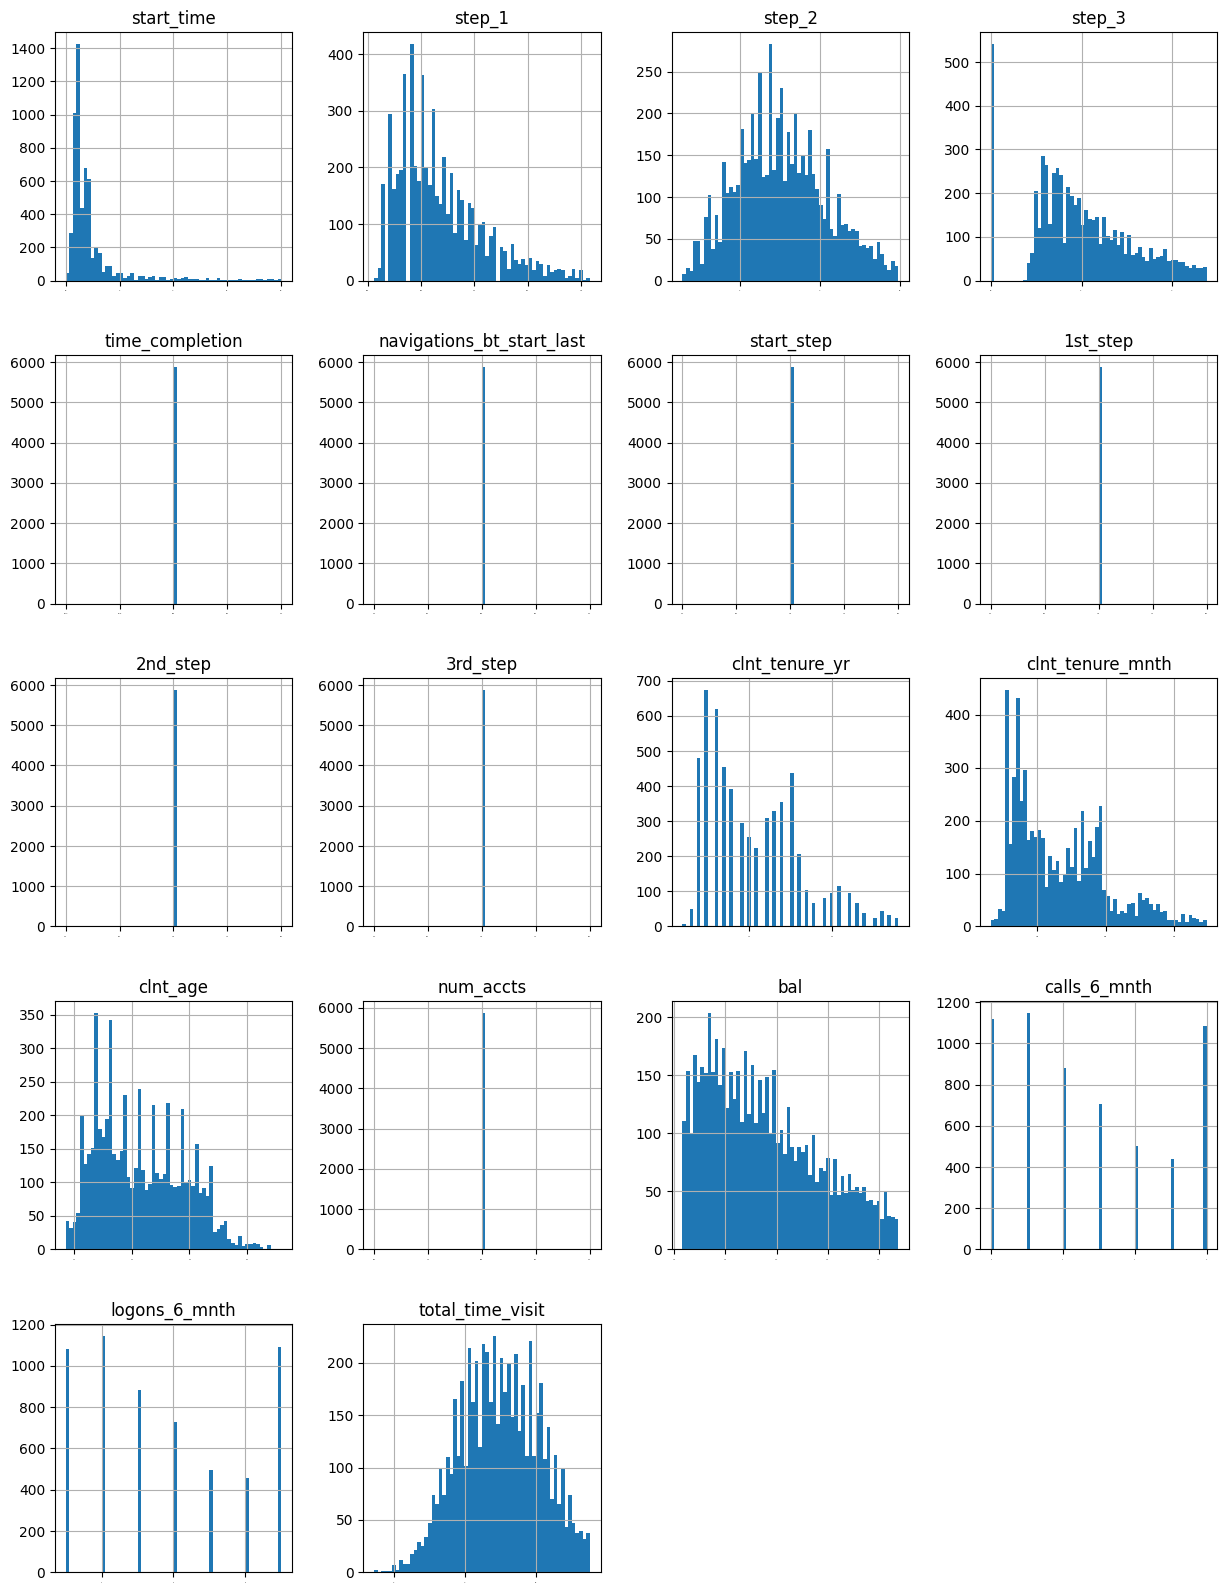

In [ ]:
df_numerical_test.hist(figsize=(15, 20), bins=60, xlabelsize=1, ylabelsize=10);

In [ ]:
for column in test_numerical_columns:
    df_test_final = remove_outliers_iqr(df_test_final, column)

    df_numerical_test = pd.DataFrame(df_test_final[test_numerical_columns]) 


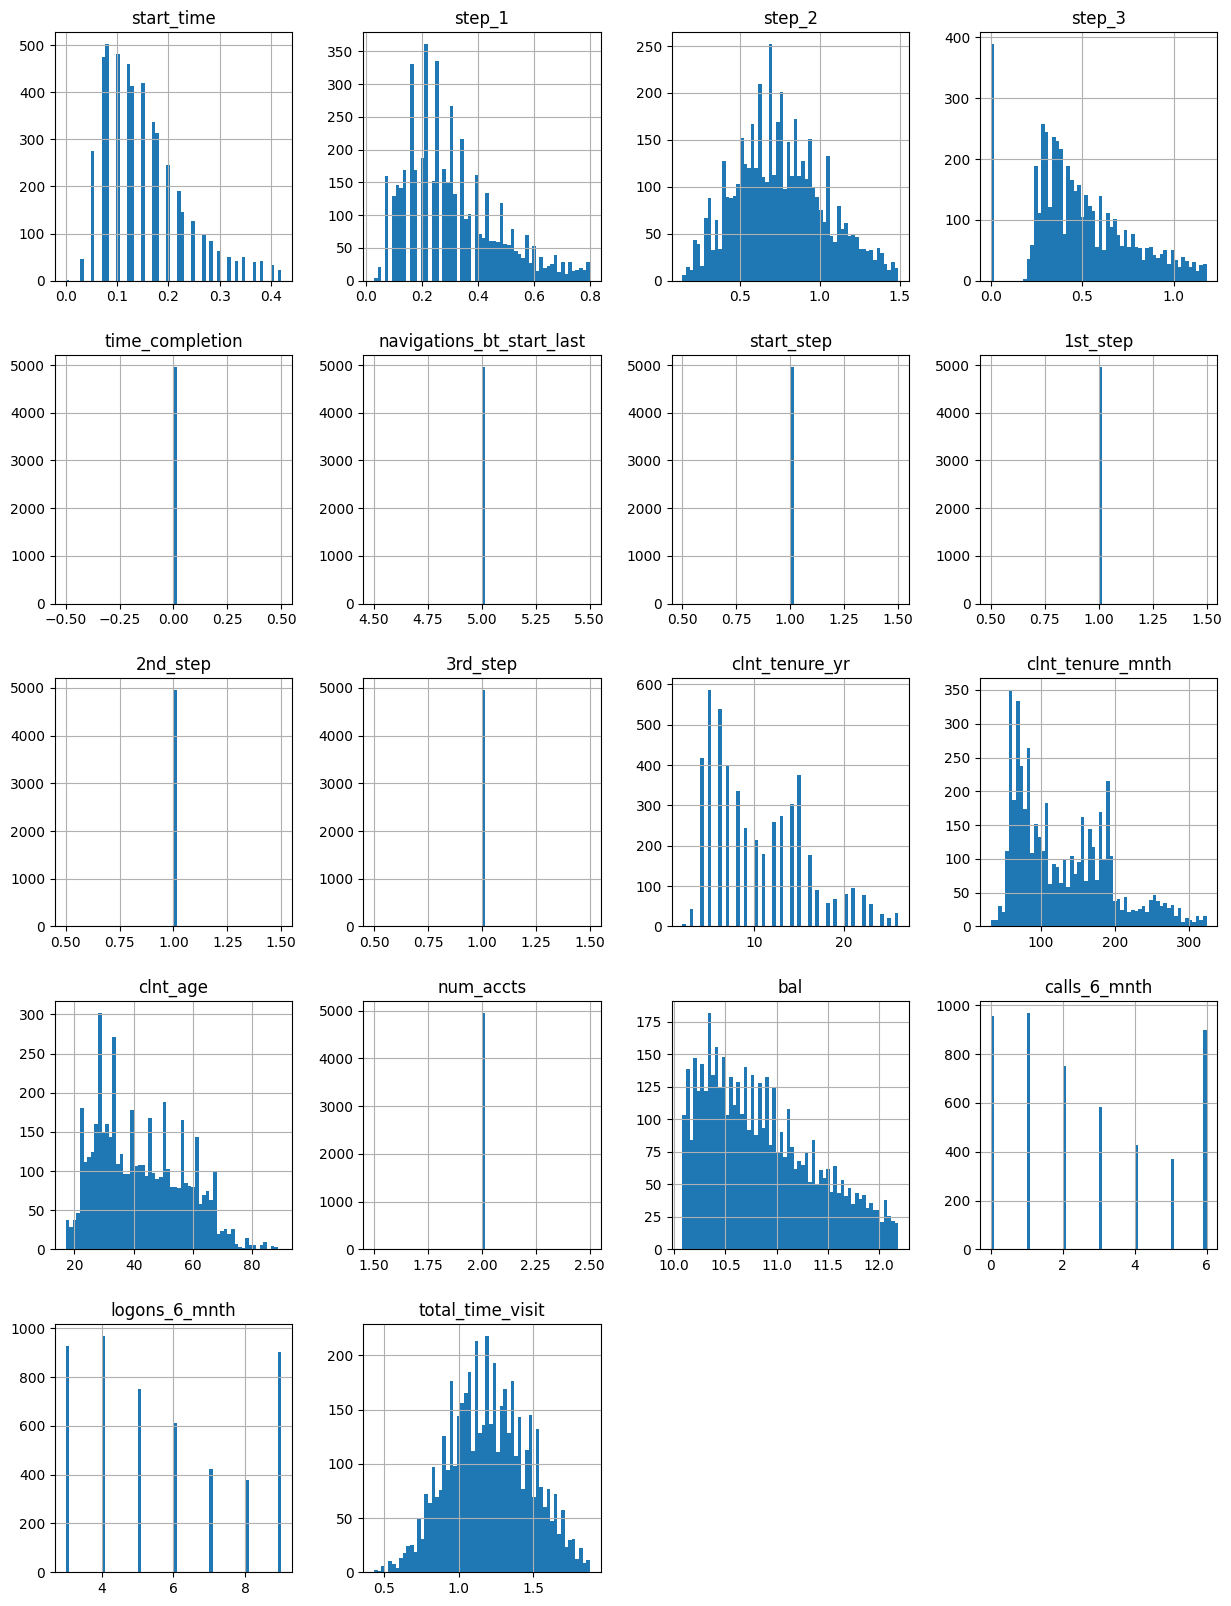

In [ ]:
df_numerical_test.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

In [ ]:
# List of columns to apply log transformation
log_transform_columns = ['step_1', 'step_2', 'step_3', 'bal', 'total_time_visit']

# Apply log transformation
for column in log_transform_columns:
    df_test_final[column] = np.log1p(df_test_final[column])


In [ ]:
df_test_final = df_test_final.to_csv('../Data/Cleaned_Data/df_test_final.csv', index=False)

Contingency Table:
              Control   Test
confirm        15381  21496
not_confirm    16854  15694

Results:
    Odds Ratio
0    1.500868
P-value: 0.00000


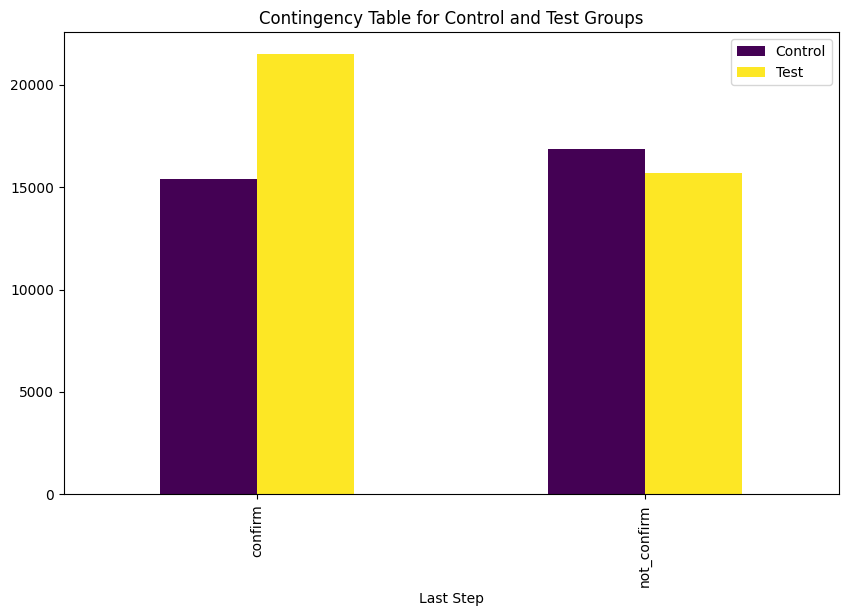

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import chi2_contingency

# Manually create the DataFrame to match the provided cross table
data = {
    'last_step': ['confirm'] * 15381 + ['not_confirm'] * 16854 + ['confirm'] * 21496 + ['not_confirm'] * 15694,
    'variation': ['Control'] * (15381 + 16854) + ['Test'] * (21496 + 15694)
}

df_final = pd.DataFrame(data)

# Initialize counters
confirm_control = 0
drop_page_control = 0
confirm_test = 0
drop_page_test = 0

# Count occurrences in each group
for index, row in df_final.iterrows():
    if row['variation'] == 'Control':
        if row['last_step'] == 'confirm':
            confirm_control += 1
        else:
            drop_page_control += 1
    else:  # Test group
        if row['last_step'] == 'confirm':
            confirm_test += 1
        else:
            drop_page_test += 1

# Create the contingency table manually
contingency_table = pd.DataFrame({
    'Control': [confirm_control, drop_page_control],
    'Test': [confirm_test, drop_page_test]
}, index=['confirm', 'not_confirm'])

# Calculate odds ratio and log odds manually
odds_control = confirm_control / drop_page_control
odds_test = confirm_test / drop_page_test
odds_ratio = odds_test / odds_control

log_odds = np.log(odds_ratio)

# Calculate chi-square test p-value
chi2, p, dof, ex = chi2_contingency(contingency_table)

# Display the results
results = {
    "Odds Ratio": [odds_ratio],
}

results_df = pd.DataFrame(results)

print("Contingency Table:\n", contingency_table)
print("\nResults:\n", results_df)
print(f"P-value: {p:.5f}")

# Plotting the contingency table
fig, ax = plt.subplots(figsize=(10, 6))
colors = cm.viridis(np.linspace(0, 1, 2))
contingency_table.plot(kind='bar', ax=ax, color=colors)
ax.set_title('Contingency Table for Control and Test Groups')
ax.set_xlabel('Last Step')
odds_ratio_text = f'Odds Ratio: {odds_ratio:.2f}'



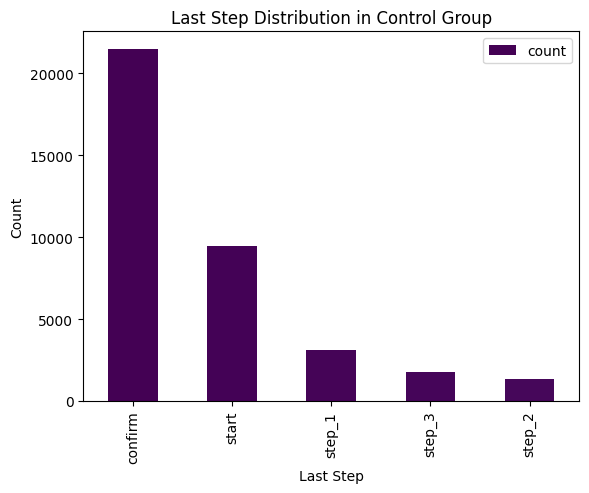

In [ ]:
import matplotlib.cm as cm


tab_control_last_step

# Create a bar plot with the Viridis palette
fig, ax = plt.subplots()
colors = cm.viridis(range(len(tab_control_last_step)))
tab_control_last_step.plot(x='last_step', y='count', kind='bar', color=colors, ax=ax)
ax.set_xlabel('Last Step')
ax.set_ylabel('Count')
ax.set_title('Last Step Distribution in Control Group')

# Show the plot
plt.show()